
--------------------------------------
**notebooks/Model_Evaluation.ipynb**
```markdown
# Model_Evaluation.ipynb

В этом ноутбуке мы:
1. Загрузим сохраненные модели (IsolationForest, RandomForest).
2. Рассчитаем метрики на тестовых данных.
3. Построим ROC-кривые, PR-кривые.
4. Сравним результаты моделей друг с другом.

ISO metrics: {'precision': np.float64(0.6818937342422262), 'recall': np.float64(0.4373558846957782), 'f1': np.float64(0.5329110367551276), 'roc_auc': np.float64(0.783035966845494)}


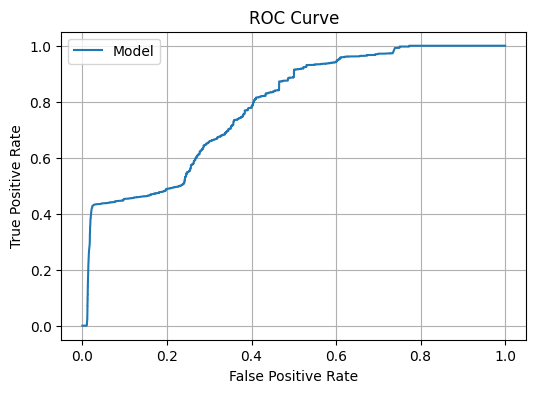

RF metrics: {'precision': np.float64(0.9975303757785011), 'recall': np.float64(0.9966939574886056), 'f1': np.float64(0.9971119912281228), 'roc_auc': np.float64(0.9997745114234884)}


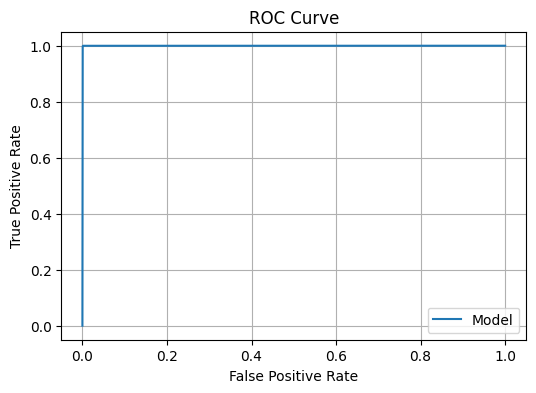

In [3]:
import sys
sys.path.append("..")  # чтобы найти evaluation
from evaluation.metrics import MetricsEvaluator
from evaluation.visualization import Visualization

from tensorflow.keras.models import load_model
import pandas as pd
import joblib
import json
import numpy as np

# Загружаем тестовые данные
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Загружаем пороги
with open("../models/thresholds.json") as f:
    thresholds = json.load(f)


# Isolation Forest
iso = joblib.load("../models/isolation_forest_model.pkl")
iso_scores = iso.decision_function(X_test.values)*-1
iso_threshold = thresholds.get("iso_threshold", 0.5)
iso_metrics = MetricsEvaluator.evaluate(y_test, iso_scores, threshold=iso_threshold)
print("ISO metrics:", iso_metrics)
Visualization.plot_roc(y_test, iso_scores)

# Random Forest
rf = joblib.load("../models/random_forest_model.pkl")
rf_scores = rf.predict_proba(X_test)[:,1]
rf_metrics = MetricsEvaluator.evaluate(y_test, rf_scores)
print("RF metrics:", rf_metrics)
Visualization.plot_roc(y_test, rf_scores)